### 1. Lectura de los Datos

In [1]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB 
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import plotly.graph_objs as go
from plotly.offline import iplot

In [2]:
# Cargar datos
data = pd.read_csv('C:/Users/eliza/OneDrive/Desktop/Claus/Konrad/NLP/reviews_vidjew_es.csv')
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [3]:
#Revisar balanceo de los datos
data.stars.value_counts(normalize=True)

5    0.233
1    0.220
3    0.201
4    0.176
2    0.170
Name: stars, dtype: float64

In [4]:
train, test = train_test_split(data, test_size=0.2, random_state=50)

print(f"Tenemos {data.shape[0]} datos en total.")
print(f"El conjunto de datos de entrenamiento (train) tiene {train.shape[0]} datos.")
print(f"El conjunto de datos de prueba (test) tiene {test.shape[0]} datos.")

Tenemos 1000 datos en total.
El conjunto de datos de entrenamiento (train) tiene 800 datos.
El conjunto de datos de prueba (test) tiene 200 datos.


### 2. Pre-procesamiento del texto

In [5]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split()
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

In [6]:
tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [7]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.stars.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.stars.values

print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (800, 3238)
Tamaño de X_test (prueba): (200, 3238)
Tamaño de y_train 800 y tamaño de y_test 200


### 3. Entrenamiento del modelo Naive-Bayes

In [8]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

### 4. Métricas de evaluación del modelo

In [9]:
#Medida de rendimiento en el conjunto de prueba
y_pred_nb = nb.predict(X_test)
print(f"Exactitud del modelo de Naive Bayes: {accuracy_score(y_test, y_pred_nb):>.2f}")

Exactitud del modelo de Naive Bayes: 0.47


In [10]:
#Métricas
print("Modelo de Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()

Modelo de Naive Bayes
              precision    recall  f1-score   support

           1       0.59      0.67      0.63        48
           2       0.11      0.04      0.06        25
           3       0.23      0.26      0.25        38
           4       0.69      0.25      0.37        36
           5       0.51      0.77      0.61        53

    accuracy                           0.47       200
   macro avg       0.43      0.40      0.38       200
weighted avg       0.46      0.47      0.43       200




### 5. Matriz de Confusión

In [11]:
confusion_matrix(y_test, y_pred_nb)

array([[32,  2,  8,  0,  6],
       [10,  1,  8,  0,  6],
       [ 6,  3, 10,  4, 15],
       [ 4,  2,  8,  9, 13],
       [ 2,  1,  9,  0, 41]], dtype=int64)

Text(0.5, 1.0, 'Naive Bayes')

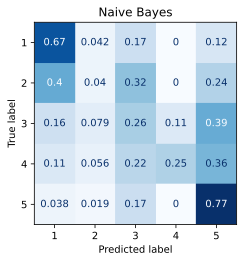

In [12]:
#formato svg para configurar la imagen
%config InlineBackend.figure_format = 'svg'
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
plot_confusion_matrix(nb, X_test, y_test, cmap="Blues", ax=ax1, normalize='true').im_.colorbar.remove()
plt.title("Naive Bayes")

### 6. Términos más importantes de cada categoría

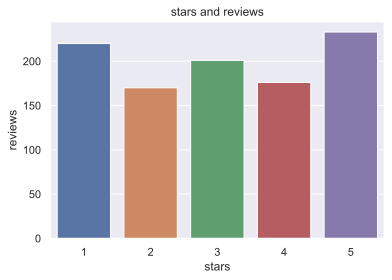

In [13]:
import seaborn as sns
sns.set()
sns.countplot(data=data,x='stars',orient="h")
plt.title("stars and reviews")
plt.xlabel("stars")
plt.ylabel("reviews")
plt.show()

In [14]:
dfstar1 = data[data.stars == 1]
dfstar2 = data[data.stars == 2]
dfstar3 = data[data.stars == 3]
dfstar4 = data[data.stars == 4]
dfstar5 = data[data.stars == 5]

In [15]:
import nltk
from nltk.tokenize import RegexpTokenizer

In [18]:
#Palabras que contribuyen a la categoría "1 estrella"
star1 = []
regexp=RegexpTokenizer(r"\w+")

for i in range(dfstar1.shape[0]):
    x = dfstar1.iloc[i].review_body
    x = regexp.tokenize(x)
    x = [palabra for palabra in x if palabra not in stopwords_sp]
    x = [t for t in x if len(t)>3] 
    star1.append(x)  

In [19]:
from collections import Counter
words_star1=[line for line in star1 for line in set(line)]
words_star1 = Counter(words_star1)
words_star1 = words_star1.most_common(20)
words_star1 = pd.DataFrame(words_star1,columns = ['Words', 'Frequency'])
words_star1.head(10)

,Words,Frequency
0,producto,31
1,llegado,25
2,bien,18
3,calidad,18
4,juego,17
5,llegó,14
6,pedido,13
7,Amazon,12
8,regalo,11
9,roto,11


In [20]:
#Palabras que contribuyen a la categoría "2 estrellas"
star2 = []

for i in range(dfstar2.shape[0]):
    x = dfstar2.iloc[i].review_body
    x = regexp.tokenize(x)
    x = [palabra for palabra in x if palabra not in stopwords_sp]
    x = [t for t in x if len(t)>3] 
    star2.append(x)  

In [21]:
words_star2=[line for line in star2 for line in set(line)]
words_star2 = Counter(words_star2)
words_star2 = words_star2.most_common(20)
words_star2=pd.DataFrame(words_star2,columns = ['Words', 'Frequency'])
words_star2.head(10)

,Words,Frequency
0,bien,34
1,calidad,29
2,precio,24
3,juego,21
4,parece,15
5,foto,15
6,puede,14
7,producto,13
8,bonito,12
9,aunque,12


In [22]:
#Palabras que contribuyen a la categoría "3 estrellas"
star3 = []

for i in range(dfstar3.shape[0]):
    x = dfstar3.iloc[i].review_body
    x = regexp.tokenize(x)
    x = [palabra for palabra in x if palabra not in stopwords_sp]
    x = [t for t in x if len(t)>3] 
    star3.append(x) 

In [23]:
words_star3=[line for line in star3 for line in set(line)]
words_star3 = Counter(words_star3)
words_star3 = words_star3.most_common(20)
words_star3 = pd.DataFrame(words_star3,columns = ['Words', 'Frequency'])
words_star3.head(10)

,Words,Frequency
0,bien,45
1,calidad,27
2,precio,25
3,juego,23
4,producto,15
5,queda,12
6,solo,12
7,bonitos,11
8,foto,11
9,tamaño,11


In [24]:
#Palabras que contribuyen a la categoría "4 estrellas"
star4 = []

for i in range(dfstar4.shape[0]):
    x = dfstar4.iloc[i].review_body
    x = regexp.tokenize(x)
    x = [palabra for palabra in x if palabra not in stopwords_sp]
    x = [t for t in x if len(t)>3] 
    star4.append(x) 

In [25]:
words_star4=[line for line in star4 for line in set(line)]
words_star4 = Counter(words_star4)
words_star4 = words_star4.most_common(20)
words_star4 = pd.DataFrame(words_star4,columns = ['Words', 'Frequency'])
words_star4.head(10)

,Words,Frequency
0,bien,36
1,precio,30
2,calidad,24
3,bastante,18
4,juego,18
5,bonito,17
6,producto,16
7,regalo,16
8,buena,16
9,buen,14


In [26]:
#Palabras que contribuyen a la categoría "5 estrellas"
star5 = []

for i in range(dfstar5.shape[0]):
    x = dfstar5.iloc[i].review_body
    x = regexp.tokenize(x)
    x = [palabra for palabra in x if palabra not in stopwords_sp]
    x = [t for t in x if len(t)>3] 
    star5.append(x)

In [27]:
words_star5=[line for line in star5 for line in set(line)]
words_star5 = Counter(words_star5)
words_star5 = words_star5.most_common(20)
words_star5 = pd.DataFrame(words_star5,columns = ['Words', 'Frequency'])
words_star5.head(10)

,Words,Frequency
0,bien,36
1,calidad,34
2,precio,30
3,perfecto,27
4,buena,26
5,perfectamente,20
6,buen,20
7,juego,19
8,regalo,19
9,producto,17


### Interpretación
El modelo no predice con exactitud suficiente las categorías de calificación por estrellas para los comentarios de los usuarios, posiblemente por la multiplicidad de etiquetas y la dificultad en la precisión al interpretar las palabras. El mayor nivel de exactitud en las predicciones lo alcanza en la categoría "5 estrellas", seguido de la categoría "1 estrella", porque probablemente asemeja a estas categorías las palabras "bueno" y "malo", pero no para las demás.